<a href="https://colab.research.google.com/github/Sourav-Manik/Machine_Learning/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries and Datasets

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
cars_data = pd.read_csv('/content/Cars.csv')

In [ ]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#Data Understanding

In [ ]:
cars_data.shape

(81, 5)

In [ ]:
cars_data.dtypes  

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [ ]:
cars_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
cars_data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

#Model Building

Model building using Statsmodel

In [ ]:
X = cars_data.drop(labels= ['MPG'],axis = 1)           #Independent variables
y = cars_data[['MPG']]                                 #Dependent variable

In [ ]:
X.head()

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149


#Data tranformation


Let's scale the data for Homoscedasticity check

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X = pd.DataFrame(data = scaled_X,columns = X.columns)
scaled_X

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [ ]:
scaled_X.mean()

HP    -6.579099e-17
VOL    1.021131e-16
SP     1.345974e-15
WT     1.091034e-15
dtype: float64

In [ ]:
scaled_X.std()

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

#Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #Model Initialization
linear_model.fit(scaled_X,y)

LinearRegression()

In [ ]:
linear_model.intercept_, linear_model.coef_

(array([34.42207573]),
 array([[-11.66095549,  -7.44803145,   5.57581553,   2.98284187]]))

#Model Testing

In [ ]:
y_pred = linear_model.predict(scaled_X)

#Model Evaluation

In [ ]:
error = y-y_pred
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


#Assumption Check

##Linearity Test

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x576 with 0 Axes>

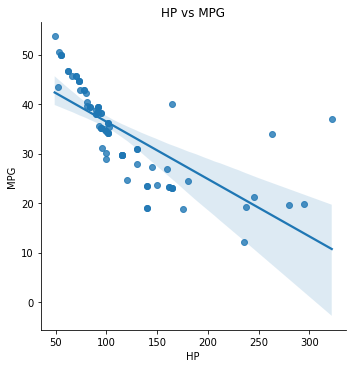

In [ ]:
plt.figure(figsize = (20,8))
sns.lmplot(x= 'HP', y ='MPG',data = cars_data)
plt.title('HP vs MPG')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x576 with 0 Axes>

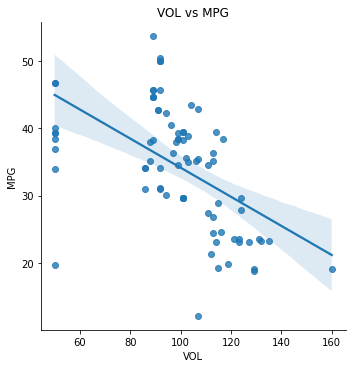

In [ ]:
plt.figure(figsize = (20,8))
sns.lmplot(x= 'VOL', y ='MPG',data = cars_data)
plt.title('VOL vs MPG')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x576 with 0 Axes>

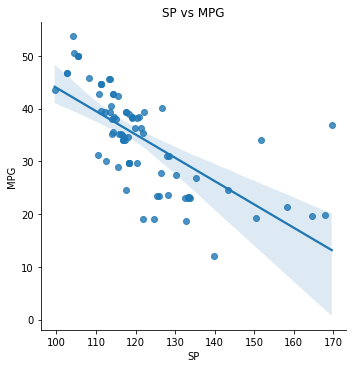

In [ ]:
plt.figure(figsize = (20,8))
sns.lmplot(x= 'SP', y ='MPG',data = cars_data)
plt.title('SP vs MPG')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x576 with 0 Axes>

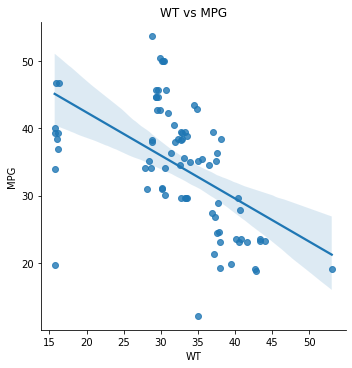

In [ ]:
plt.figure(figsize = (20,8))
sns.lmplot(x= 'WT', y ='MPG',data = cars_data)
plt.title('WT vs MPG')
plt.show

**Note** - All input features should pass the linearity test. In the above case none of the above input features passes Linearity test.

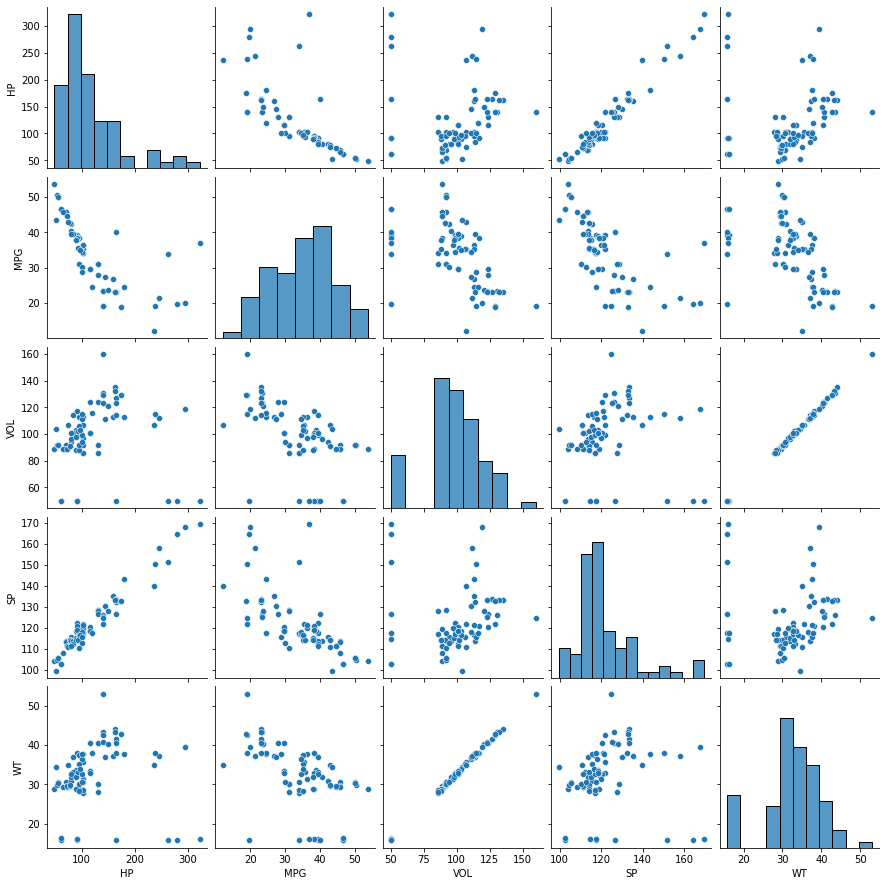

In [ ]:
sns.pairplot(cars_data)

##Normality Test

It can be achieved using different techniques:

1. Displot

2. QQplot

3. Probplot

In [ ]:
cars_data.head(2)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833


Displot

<function matplotlib.pyplot.show(*args, **kw)>

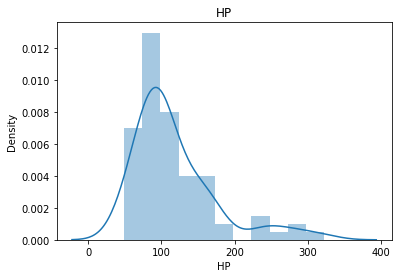

In [ ]:
sns.distplot(a =cars_data['HP'])
plt.title('HP')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

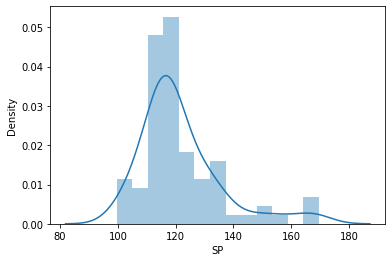

In [ ]:
sns.distplot(a =cars_data['SP'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

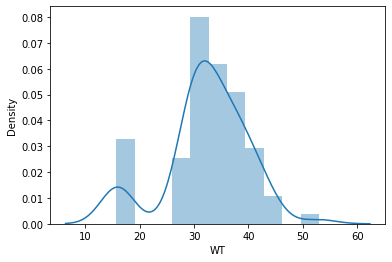

In [ ]:
sns.distplot(a =cars_data['WT'])
plt.show

In [ ]:
cars_data.skew()

HP     1.716216
MPG   -0.177947
VOL   -0.590197
SP     1.611450
WT    -0.614753
dtype: float64

Probplot

In [ ]:
from scipy import stats

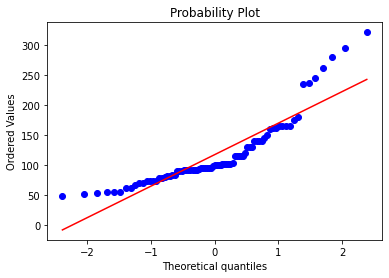

In [ ]:
stats.probplot(x = cars_data['HP'],dist='norm',plot = plt)
plt.show()

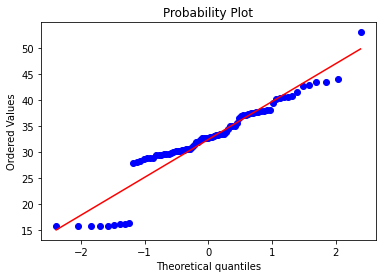

In [ ]:
stats.probplot(x = cars_data['WT'],dist='norm',plot = plt)
plt.show()

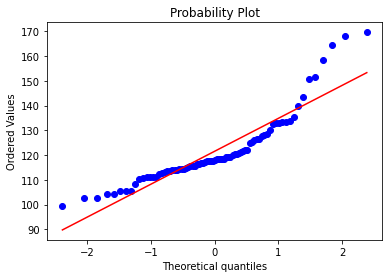

In [ ]:
stats.probplot(x = cars_data['SP'],dist='norm',plot = plt)
plt.show()

Normality test also failed.

##Multicollinearity Test

Multicollinearity Test can be checked by 2 techniques:

1. Correlation Matrix

2. VIF - Variance Inflation Factor



1. Correlation Matrix

In [ ]:
cars_data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


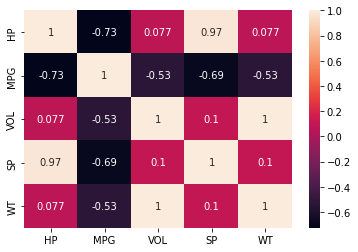

In [ ]:
sns.heatmap(cars_data.corr(),annot = True)

As some of independent features is high correlated with each other. Multi-collinearity test is also failed.

##AutoRegression Test

Passed as there is no time based data present.

##Homoscedasticity Test

**Note** - 

It can be only preformed post model training.

For Homoscedasticity check all you **input feature** should be in a **similar scale**.

Homoscedasticity test is passed when we have similar variance across 0.

It is a plot between Input vs Error (Error: y-y_pred)

Homoscedasticity Test

<function matplotlib.pyplot.show(*args, **kw)>

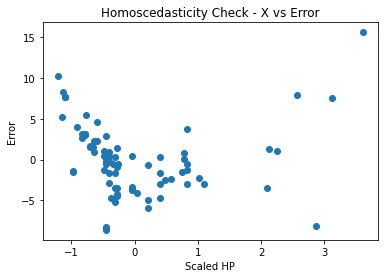

In [ ]:
plt.scatter(x = scaled_X['HP'],y = error)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Scaled HP')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

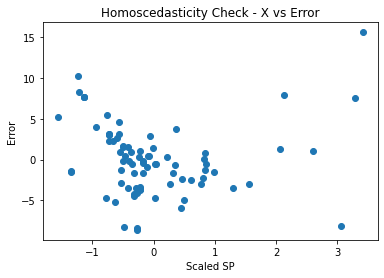

In [ ]:
plt.scatter(x = scaled_X['SP'],y = error)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Scaled SP')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

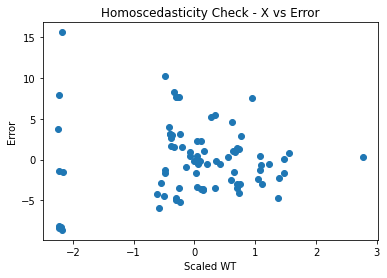

In [ ]:
plt.scatter(x = scaled_X['WT'],y = error)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Scaled WT')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

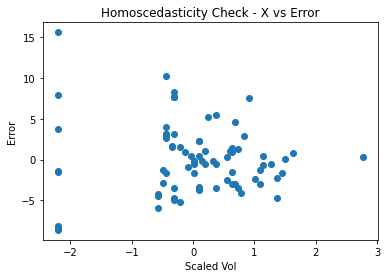

In [ ]:
plt.scatter(x = scaled_X['VOL'],y = error)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Scaled Vol')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - X vs Error')
plt.show

##Zero Residual Mean Test

**Note** - 

It can be only preformed post model training.

It's a plot between Actual Output Vs Predicted Output

<function matplotlib.pyplot.show(*args, **kw)>

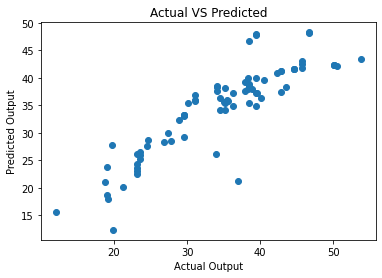

In [ ]:
plt.scatter(x = cars_data['MPG'],y = y_pred)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

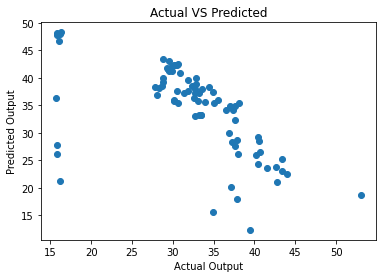

In [ ]:
plt.scatter(x = cars_data['WT'],y = y_pred)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

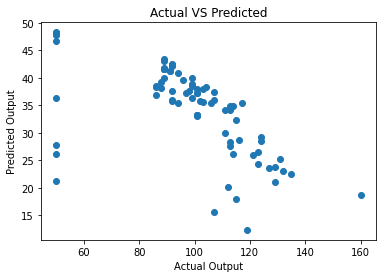

In [ ]:
plt.scatter(x = cars_data['VOL'],y = y_pred)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

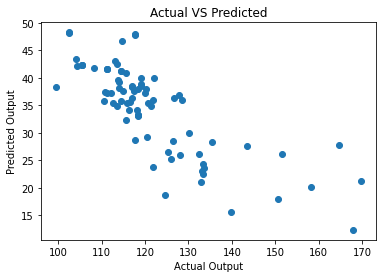

In [ ]:
plt.scatter(x = cars_data['SP'],y = y_pred)  # we canot use sns because input features are from different dataframe.
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual VS Predicted')
plt.show

#Model Optimization Techniques

###Using statsmodel build linear regression

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
#model 1 : all features are selected
model_1 = smf.ols(formula = 'MPG~HP+SP+VOL+WT',data=cars_data).fit()

In [ ]:
model_1.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
VOL          -0.336051
WT            0.400574
dtype: float64

**Summarize the regression model**

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.54e-23
Time:                        12:42:34   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Hypothesis Statement**

H0: This feature is not significant for making prediction.

Ha: This feature is significant for making prediction.

In [ ]:
#model 2 : WT has been removed
model_2 = smf.ols(formula = 'MPG~HP+SP+VOL',data=cars_data).fit()

In [ ]:
model_2.pvalues

Intercept    4.194554e-02
HP           8.644870e-07
SP           1.207855e-02
VOL          1.648229e-13
dtype: float64

In [ ]:
#model 3 : VOL has been removed
model_3 = smf.ols(formula = 'MPG~HP+SP+WT',data=cars_data).fit()

In [ ]:
model_3.pvalues

Intercept    5.053995e-02
HP           7.560276e-07
SP           1.089096e-02
WT           1.914892e-13
dtype: float64

**How to choose the best model**

In [ ]:
model_a = smf.ols(formula = 'MPG~HP',data=cars_data).fit()
model_b = smf.ols(formula = 'MPG~HP+SP',data=cars_data).fit()
model_c = smf.ols(formula = 'MPG~HP+SP+VOL',data=cars_data).fit()
model_d = smf.ols(formula = 'MPG~HP+SP+VOL+WT',data=cars_data).fit()

**Model a results**

In [ ]:
print('R2 score          :',round(model_a.rsquared,4))
print('Adjusted R2 score :',round(model_a.rsquared_adj,4))
print('AIC Value         :',round(model_a.aic,4))
print('BIC Value         :',round(model_a.bic,4))

R2 score          : 0.5257
Adjusted R2 score : 0.5197
AIC Value         : 530.7453
BIC Value         : 535.5342


**Model b results**

In [ ]:
print('R2 score          :',round(model_b.rsquared,4))
print('Adjusted R2 score :',round(model_b.rsquared_adj,4))
print('AIC Value         :',round(model_b.aic,4))
print('BIC Value         :',round(model_b.bic,4))

R2 score          : 0.5326
Adjusted R2 score : 0.5207
AIC Value         : 531.5481
BIC Value         : 538.7315


**Model c results**

In [ ]:
print('R2 score          :',round(model_c.rsquared,4))
print('Adjusted R2 score :',round(model_c.rsquared_adj,4))
print('AIC Value         :',round(model_c.aic,4))
print('BIC Value         :',round(model_c.bic,4))

R2 score          : 0.7704
Adjusted R2 score : 0.7614
AIC Value         : 475.9875
BIC Value         : 485.5653


**Model d results**

In [ ]:
print('R2 score          :',round(model_d.rsquared,4))
print('Adjusted R2 score :',round(model_d.rsquared_adj,4))
print('AIC Value         :',round(model_d.aic,4))
print('BIC Value         :',round(model_d.bic,4))

R2 score          : 0.7705
Adjusted R2 score : 0.7585
AIC Value         : 477.9279
BIC Value         : 489.9002


Select the model which gives lowest adjusted R2 score and AIC value

###Using Sklearn build Linear Regression

Model Building

1. Seperate your input and output

2. Model Validation Techiques:

    *   Train-Test Split

    *   K-Fold Cross Validation

    *   Leave one out cross Validation







In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,shuffle=True, random_state = 12)
#Random_state - to pick up the same sample every time

In [ ]:
X_train

,HP,VOL,SP,WT
59,100,115,115.576579,37.662874
63,140,123,125.312342,40.722831
28,52,104,99.564907,34.483207
40,95,113,116.392639,37.392524
43,95,88,114.093383,28.343976
...,...,...,...,...
3,70,92,113.461264,30.632114
2,55,92,105.461264,30.193597
6,55,92,105.461264,30.308480
27,92,99,119.105055,32.835069


In [ ]:
y_train

,MPG
59,28.860225
63,23.515917
28,43.469434
40,35.152727
43,35.152727
...,...
3,45.696322
2,50.013401
6,50.013401
27,38.411003


Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

Model Testing

In [ ]:
#Training Data
y_pred_train = linear_model.predict(X_train)

In [ ]:
#Test Data
y_pred_test = linear_model.predict(X_test)

Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#training data
mean_squared_error(y_train,y_pred_train)

19.136456810926457

In [ ]:
#test data
mean_squared_error(y_test,y_pred_test)

23.457874597619135

#Model Improvement/Transformation Techniques 

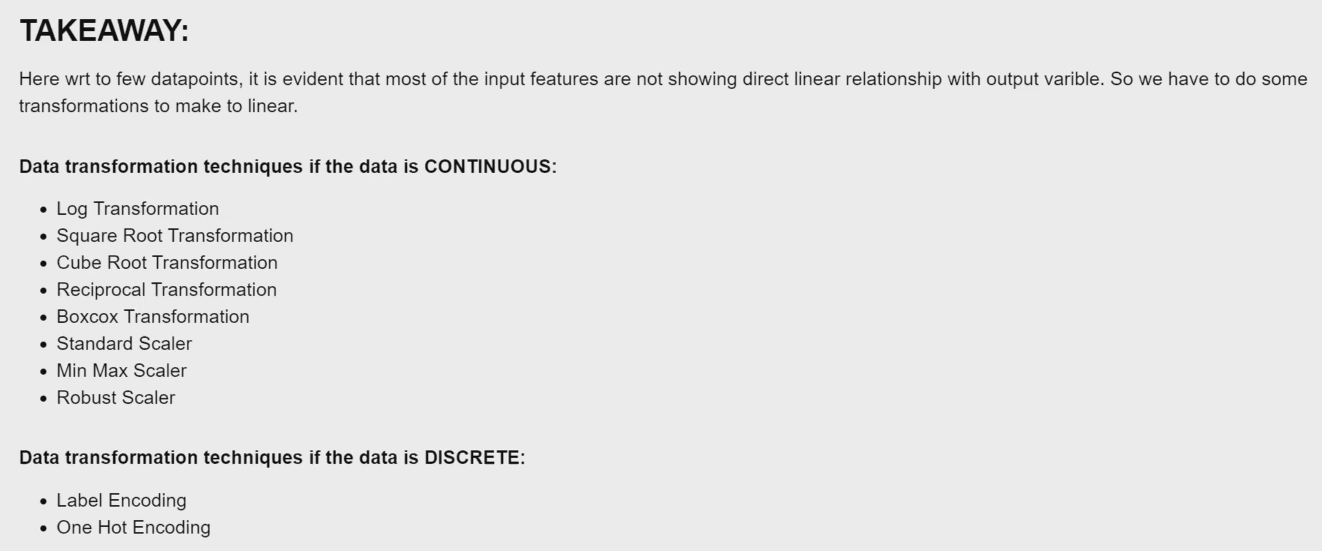

In [ ]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
import numpy as np

In [ ]:
cars_data['log_HP'] = np.log(cars_data['HP'])
cars_data['log_VOL'] = np.log(cars_data['VOL'])
cars_data['log_SP'] = np.log(cars_data['SP'])
cars_data['log_WT'] = np.log(cars_data['WT'])

In [ ]:
cars_data.head()

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x576 with 0 Axes>

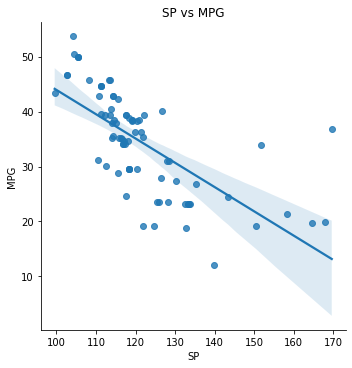

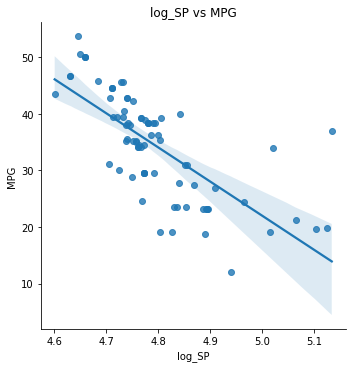

In [ ]:
plt.figure(figsize = (20,8))
sns.lmplot(x= 'SP', y ='MPG',data = cars_data)
plt.title('SP vs MPG')
sns.lmplot(x= 'log_SP', y ='MPG',data = cars_data)
plt.title('log_SP vs MPG')
plt.show

End